In [2]:
import re
import numpy as np
import pandas as pd
from requests_html import HTMLSession

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt

In [3]:
URL = "http://insideairbnb.com/get-the-data"

In [4]:
def get_cities(URL="http://insideairbnb.com/get-the-data"):
    
    session = HTMLSession()
    links = session.get(URL).html.links
    session.close()
    cities = list(filter(lambda x: 'http' not in x and len(x) > 1 and 'about' not in x and 'explore' not in x, links))
    cities = [city.split('/')[1] for city in cities]
    cities.sort()
    
    print(cities)
    
    
def get_countries(URL="http://insideairbnb.com/get-the-data"):
    
    session = HTMLSession()
    links = session.get(URL).html.links
    session.close()
    data = list(filter(lambda x: 'http://data' in x, links))
    
    countries = [link.split('http://data.insideairbnb.com/')[1] for link in data]
    countries = [country.split('/')[0] for country in countries]
    countries = list(set(countries))
    countries.sort()
    
    print(countries)
    
    
def get_city_data(city, URL="http://insideairbnb.com/get-the-data"):
        
    session = HTMLSession()
    links = session.get(URL).html.links
    session.close()
    data_url = list(filter(lambda x: city in x and 'listings.csv.gz' in x, links))[0]
    
    return pd.read_csv(data_url)


def get_country_data(country, URL="http://insideairbnb.com/get-the-data"):
    
    session = HTMLSession()
    links = session.get(URL).html.links
    session.close()
    data_urls = list(filter(lambda x: country in x and 'listings.csv.gz' in x, links))
    data = []
    
    for url in data_urls:
        data.append(pd.read_csv(url))
        
    return pd.concat(data)

In [5]:
get_cities()

['amsterdam', 'antwerp', 'asheville', 'athens', 'austin', 'bangkok', 'barcelona', 'barossa-valley', 'barwon-south-west-vic', 'beijing', 'belize', 'bergamo', 'berlin', 'bologna', 'bordeaux', 'boston', 'bristol', 'broward-county', 'brussels', 'buenos-aires', 'cambridge', 'cape-town', 'chicago', 'clark-county-nv', 'collaborate', 'columbus', 'copenhagen', 'crete', 'dallas', 'data-assumptions', 'data-community', 'data-policies', 'data-requests', 'denver', 'donate', 'dublin', 'edinburgh', 'euskadi', 'florence', 'fort-worth', 'geneva', 'get-the-data', 'ghent', 'girona', 'greater-manchester', 'hawaii', 'hong-kong', 'ireland', 'istanbul', 'jersey-city', 'lisbon', 'london', 'los-angeles', 'lyon', 'madrid', 'malaga', 'mallorca', 'malta', 'melbourne', 'menorca', 'mexico-city', 'mid-north-coast', 'milan', 'montreal', 'mornington-peninsula', 'munich', 'naples', 'nashville', 'new-brunswick', 'new-orleans', 'new-york-city', 'new-zealand', 'newark', 'northern-rivers', 'oakland', 'oslo', 'pacific-grove'

In [6]:
amsterdam = get_city_data('asheville')
amsterdam.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20220914194751,2022-09-14,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental $1...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,320564,...,4.79,4.84,4.48,NaN,f,2,2,0,0,0.67
1,155305,https://www.airbnb.com/rooms/155305,20220914194751,2022-09-14,city scrape,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,...,4.74,4.93,4.54,NaN,t,7,1,2,4,2.72
2,156805,https://www.airbnb.com/rooms/156805,20220914194751,2022-09-14,previous scrape,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,...,4.61,4.84,4.46,NaN,t,7,1,2,4,0.50
3,156926,https://www.airbnb.com/rooms/156926,20220914194751,2022-09-14,city scrape,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,...,4.80,4.79,4.79,NaN,t,7,1,2,4,2.34
4,197263,https://www.airbnb.com/rooms/197263,20220914194751,2022-09-14,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.92,4.82,4.98,NaN,f,2,1,1,0,0.49


In [7]:
def clean(df):
    to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'host_id', 'host_url','host_name','host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed','bathrooms','minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','host_neighbourhood','neighbourhood','license']
    df = df.drop(to_drop, axis = 1) #drop unnecessary/redundant columns
    
    df['description']= df['description'].str.replace(r'<[^<>]*>', '', regex=True) #cleaning
    df['host_about']= df['host_about'].str.replace('\r\n','')             # descriptions from
    df['host_about']= df['host_about'].str.replace(r'<[^<>]*>', '', regex=True) #html tags
    
    to_datetime = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']
    for col in to_datetime:
        df[col] = pd.to_datetime(df[col])
    
    df['host_verifications'] = df['host_verifications'].apply(lambda x: x.strip('][').split(', '))
    df['num_verifications'] = df['host_verifications'].apply(lambda x:len(x))
    df['amenities'] = df['amenities'].apply(lambda x: x.strip('][').split(', '))
    df['num_amenities'] = df['amenities'].apply(lambda x:len(x))
    
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['min_price'] = df['price'] * df['minimum_nights']
    df['max_price'] = df['price'] * df['maximum_nights']
    
    boolean = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
    for col in boolean:
            df[col] = df[col].apply(lambda x: True if (x == "t") else False)
    
    df.replace("N/A", None)
    
    NA_to_empty = ['neighborhood_overview', 'host_about', 'description']
    for col in NA_to_empty:
            df[col] = df[col].replace(np.nan, '', regex=True)
    
    imputate_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                      'review_scores_value', 'reviews_per_month']
    for col in imputate_scores:
        df[col].fillna(value=df[col].mean(), inplace=True)
    
    df["neighborhood_overview_wordcount"] = df["neighborhood_overview"].apply(lambda x: len(x.split(" ")))
    df["host_about_wordcount"] = df["host_about"].apply(lambda x: len(x.split(" ")))
    df["description_wordcount"] = df["description"].apply(lambda x: len(x.split(" ")))

    df = df.replace(
    ['within an hour', 'within a few hours', 'within a day', 'a few days or more'], 
    [0, 1, 2, 3])
    df['host_response_time'] = df['host_response_time'].replace(np.nan, df['host_response_time'].mode().values[0], regex=True)
    
    df['host_response_rate'] = (df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float))/100
    df['host_acceptance_rate'] = (df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float))/100
    df['host_response_rate'].fillna(value=df['host_response_rate'].mean(), inplace=True)
    df['host_acceptance_rate'].fillna(value=df['host_acceptance_rate'].mean(), inplace=True)
    
    df['has_availability'] = df['has_availability'].apply(lambda x: True if x == 't' else False)
    df['instant_bookable'] = df['instant_bookable'].apply(lambda x: True if x == 't' else False)

    if 'bathrooms_text' in df.columns.tolist():
        df['bathrooms'] = df['bathrooms_text'].apply(lambda x: float(x.split(" ")[0]) if str(x)[0].isdigit() else 0.5)
        df['is_shared_bath'] = df['bathrooms_text'].apply(lambda x: True if "hared" in str(x) else False)
    
    encoder = OneHotEncoder(sparse=False)
    encoded_room_types = pd.DataFrame(encoder.fit_transform(df[['room_type']]), columns=[ 'encoded_room_type_' + str(i) for i in range(df['room_type'].value_counts().shape[0])])
    df = pd.concat([df, encoded_room_types], axis=1)

    df = df.dropna()
    
    return df


In [8]:
cleaned = clean(amsterdam)
cleaned.head()

/Users/sangwooksuh/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/pandas/core/missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


,id,name,description,neighborhood_overview,picture_url,host_since,host_location,host_about,host_response_time,host_response_rate,...,max_price,neighborhood_overview_wordcount,host_about_wordcount,description_wordcount,bathrooms,is_shared_bath,encoded_room_type_0,encoded_room_type_1,encoded_room_type_2,encoded_room_type_3
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental $1...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/41011975/0cdf...,2010-12-16,"Asheville, NC",I am a long time resident of Asheville and am ...,0.0,0.9,...,43800.0,49,22,154,1.0,False,1.0,0.0,0.0,0.0
1,155305,Cottage! BonPaul + Sharky's Hostel,The spacePrivate cottage located behind the ma...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,2011-06-26,"Asheville, NC",We operate two traveler's hostels located in H...,0.0,1.0,...,36500.0,32,36,109,1.0,False,1.0,0.0,0.0,0.0
2,156805,"Private Room ""Ader"" at BPS Hostel",The spacePrivate Rooms at Bon Paul and Sharky'...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,2011-06-26,"Asheville, NC",We operate two traveler's hostels located in H...,0.0,1.0,...,24090.0,11,36,94,2.5,True,0.0,0.0,1.0,0.0
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room*Plea...,,https://a0.muscache.com/pictures/98f4e655-c4d6...,2011-06-26,"Asheville, NC",We operate two traveler's hostels located in H...,0.0,1.0,...,10950.0,1,36,162,2.5,True,0.0,0.0,0.0,1.0
4,197263,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",,https://a0.muscache.com/pictures/miso/Hosting-...,2011-08-12,"Asheville, NC","I'm from Asheville, NC. I'm a yogi, artist and...",0.0,1.0,...,180.0,1,36,163,1.0,False,0.0,0.0,1.0,0.0


In [12]:
print(f'Amsterdam data: {amsterdam.shape}')
print(f'Cleaned data: {cleaned.shape}')
print(f'Dropped {amsterdam.shape[1] - cleaned.shape[1]} columns and {round(100*cleaned.shape[0]/amsterdam.shape[0], 2)}% of rows preserved. ')

Amsterdam data: (3009, 75)
Cleaned data: (2292, 67)
Dropped 8 columns and 76.17% of rows preserved. 


In [13]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2994
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            2292 non-null   int64         
 1   name                                          2292 non-null   object        
 2   description                                   2292 non-null   object        
 3   neighborhood_overview                         2292 non-null   object        
 4   picture_url                                   2292 non-null   object        
 5   host_since                                    2292 non-null   datetime64[ns]
 6   host_location                                 2292 non-null   object        
 7   host_about                                    2292 non-null   object        
 8   host_response_time                            2292 non-null   float6

In [14]:
cleaned.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2994
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            2292 non-null   int64         
 1   host_since                                    2292 non-null   datetime64[ns]
 2   host_response_time                            2292 non-null   float64       
 3   host_response_rate                            2292 non-null   float64       
 4   host_acceptance_rate                          2292 non-null   float64       
 5   host_is_superhost                             2292 non-null   bool          
 6   host_listings_count                           2292 non-null   int64         
 7   host_total_listings_count                     2292 non-null   int64         
 8   host_has_profile_pic                          2292 non-null   bool  

In [15]:
cleaned.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2994
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   2292 non-null   object
 1   description            2292 non-null   object
 2   neighborhood_overview  2292 non-null   object
 3   picture_url            2292 non-null   object
 4   host_location          2292 non-null   object
 5   host_about             2292 non-null   object
 6   host_verifications     2292 non-null   object
 7   property_type          2292 non-null   object
 8   room_type              2292 non-null   object
 9   bathrooms_text         2292 non-null   object
 10  amenities              2292 non-null   object
dtypes: object(11)
memory usage: 214.9+ KB


In [16]:
def get_basic_Xy(cleaned_data):
    
    df = cleaned_data.drop(columns=['id', 'name', 'description', 'neighborhood_overview', 
                                    'picture_url', 'host_location', 'host_about', 
                                    'host_verifications', 'property_type', 'room_type', 
                                    'bathrooms_text', 'amenities'])
    
    for col in  df.select_dtypes(include='datetime').columns.tolist():
        df[col] = df[col].apply(pd.Timestamp.toordinal)
    
    y = df['price']
    X = df.loc[:, df.columns != 'price']

    return X, y

X, y = get_basic_Xy(cleaned)

In [17]:
# Simple quality Filter
def var_filter(X, num_features=38):
    new_cols = X.var().sort_values(ascending=False)[:num_features].index.to_list()
    return X[new_cols]

X_filtered = var_filter(X, 38)

# OLS Poly Regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=314)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.28031500340645055

In [19]:
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.1, random_state=314)

model = LinearRegression()
model.fit(X_train_filtered, y_train)
model.score(X_test_filtered, y_test)

-0.25281922242334387

At 38 features we have R^2 value of -0.25281922242334387


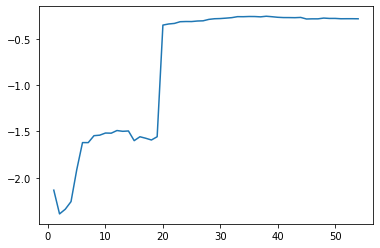

In [20]:
# Simple Quality Filter 

num_features = np.arange(1, X.shape[1]+1)

scores = np.zeros(X.shape[1])

for i in range(X.shape[1]):
    
    X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(var_filter(X, i+1), y, test_size=0.1, random_state=314)

    model = LinearRegression()
    model.fit(X_train_filtered, y_train)
    scores[i] = model.score(X_test_filtered, y_test)
    
    
plt.plot(num_features, scores)

print(f'At {scores.argmax()+1} features we have R^2 value of {scores.max()}')

In [21]:
def make_poly(X, y, degree=2):
    '''creates and returns a polynomial regression model fit with input data X and Y'''
    
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_model = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", LinearRegression())])

    return poly_model.fit(X, y)

At 2 degrees we have R^2 value of 0.7881357338516679


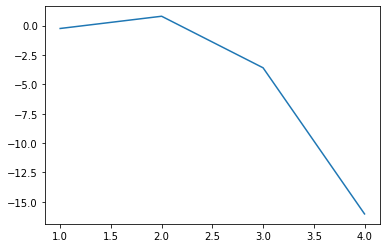

In [24]:
poly_degrees = np.arange(1, 5)

scores = np.zeros(4)

for deg in poly_degrees:
    X_train, X_test, y_train, y_test = train_test_split(var_filter(X,38), y, test_size=0.1, random_state=314)
    
    poly_model = make_poly(X_train, y_train, degree=deg)
    scores[deg-1] = poly_model.score(X_test, y_test)

plt.plot(poly_degrees, scores)
print(f'At {scores.argmax()+1} degrees we have R^2 value of {scores.max()}')

# KNN

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=314)

model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4721961598245086

At 9 features we have R^2 value of 0.47568623565630075


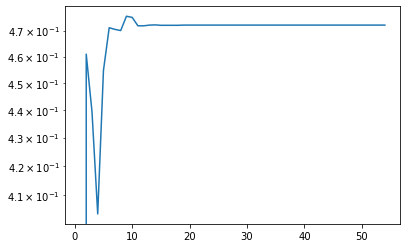

In [26]:
# Simple Quality Filter 

num_features = np.arange(1, X.shape[1]+1)

scores = np.zeros(X.shape[1])

for i in range(X.shape[1]):
    
    X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(var_filter(X, i+1), y, test_size=0.1, random_state=314)

    model = KNeighborsRegressor()
    model.fit(X_train_filtered, y_train)
    scores[i] = model.score(X_test_filtered, y_test)
    
    
plt.plot(num_features, scores)
plt.yscale("log")

print(f'At {scores.argmax()+1} features we have R^2 value of {scores.max()}')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(var_filter(X, 9), y, test_size=0.1, random_state=314)

model = KNeighborsRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.47568623565630075

At k=2 we have R^2 value of 0.5704292011436295


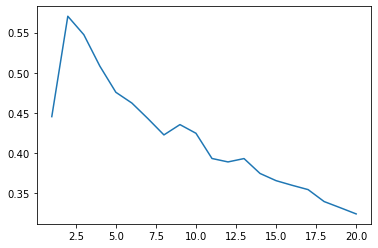

In [28]:
#Tuning k's

ks = np.arange(1, 21)

scores = np.zeros(20)

for k in ks:
    
    X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(var_filter(X,9), y, test_size=0.1, random_state=314)

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_filtered, y_train)
    scores[k-1] = model.score(X_test_filtered, y_test)
    
    
plt.plot(ks, scores)

print(f'At k={scores.argmax()+1} we have R^2 value of {scores.max()}')


## Approach

**Models used:** KNN Regressor, Polynomial Regression (linear Regression with poly feature transformations). Code Adapted from CSE 217A HW4 (Sangwook)

**Feature Selection:** Simple quality filter - features with more variance are likely to contain more information. Code for this part adapted from CSE 514A Programming Assignment 2 (Sangwook)

**Hyperparameters Tuned:**

    KNN model: k value
    Polynomial Regression: degree of feature transformation

## Conclusion
Between KNN with different k values and different degree polynomial regression models, it seems like a 2nd degree regression model performed best with $R^2$ value of 0.7881.

**Caveat:** Should have used a validation set and left a test set to see if tuned hyperparameters / feature filter can generalize. For linear regression, might have been better to choose the first # of features after performance plateaued.